<a href="https://colab.research.google.com/github/JaperTai77/Colab-notebook/blob/main/bankrupcy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages and dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
path = 'https://raw.githubusercontent.com/JaperTai77/data-modified/main/data.csv'
df = pd.read_csv(path)

# Data Preprocessing

## Check dataset

In [ ]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

## Replace column names by simplier names

In [ ]:
# Create a variable gives information of the columns
names = np.arange(1, 97, 1).tolist()
def colname(df, names = names):
  cols = df.columns
  dictionary = dict()
  for i, name in enumerate(names):
    dictionary[name] = cols[i]
  return dictionary
col_namnes = colname(df)

In [ ]:
df.columns = names
df = df.rename(columns = {1:'response'})

## Correlation of the dataset

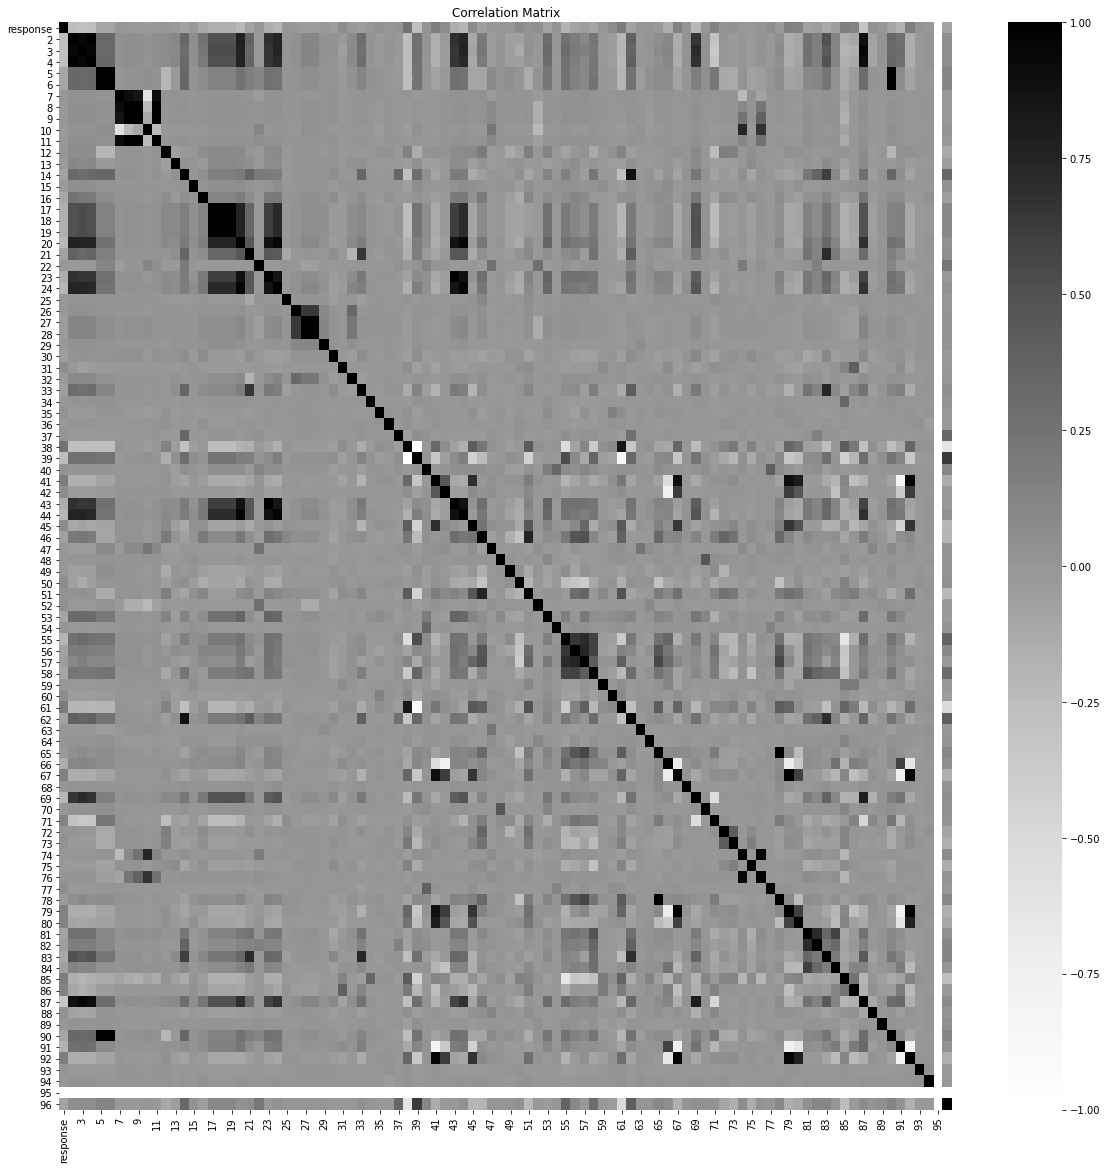

In [ ]:
def df_corr(df = df, save = False):
  plt.figure(figsize = (20,20))
  sns.heatmap(df.corr(), cmap = 'Greys').set_title('Correlation Matrix')
  if save == True:
    plt.savefig(corr.png)
df_corr(df)

Text(0.5, 1.0, 'Correlation (Response)')

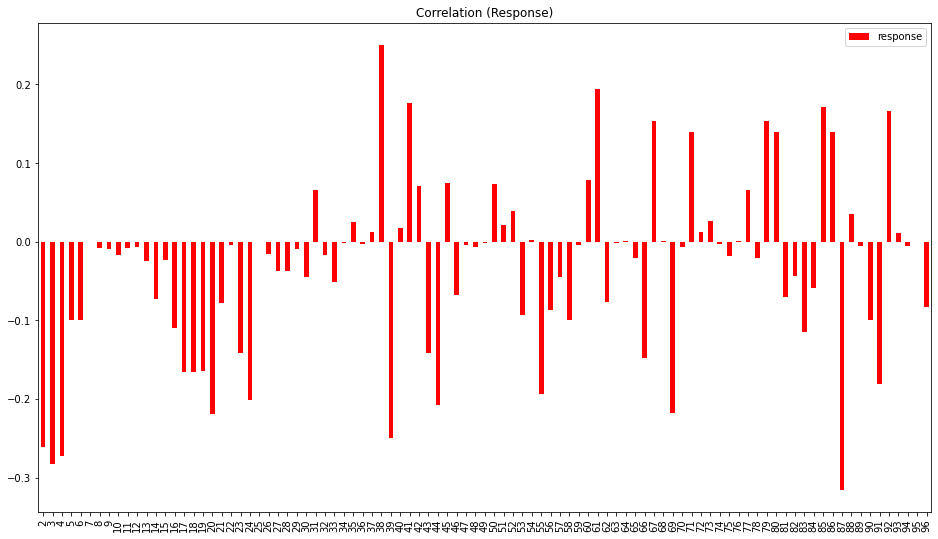

In [ ]:
pd.DataFrame(df.corr()['response'].drop('response')).plot(kind = 'bar',color = 'red',figsize = (16,9)).set_title('Correlation (Response)')

# Visualize Data

In [ ]:
col_namnes

{1: 'Bankrupt?',
 2: ' ROA(C) before interest and depreciation before interest',
 3: ' ROA(A) before interest and % after tax',
 4: ' ROA(B) before interest and depreciation after tax',
 5: ' Operating Gross Margin',
 6: ' Realized Sales Gross Margin',
 7: ' Operating Profit Rate',
 8: ' Pre-tax net Interest Rate',
 9: ' After-tax net Interest Rate',
 10: ' Non-industry income and expenditure/revenue',
 11: ' Continuous interest rate (after tax)',
 12: ' Operating Expense Rate',
 13: ' Research and development expense rate',
 14: ' Cash flow rate',
 15: ' Interest-bearing debt interest rate',
 16: ' Tax rate (A)',
 17: ' Net Value Per Share (B)',
 18: ' Net Value Per Share (A)',
 19: ' Net Value Per Share (C)',
 20: ' Persistent EPS in the Last Four Seasons',
 21: ' Cash Flow Per Share',
 22: ' Revenue Per Share (Yuan ¥)',
 23: ' Operating Profit Per Share (Yuan ¥)',
 24: ' Per Share Net profit before tax (Yuan ¥)',
 25: ' Realized Sales Gross Profit Growth Rate',
 26: ' Operating Prof

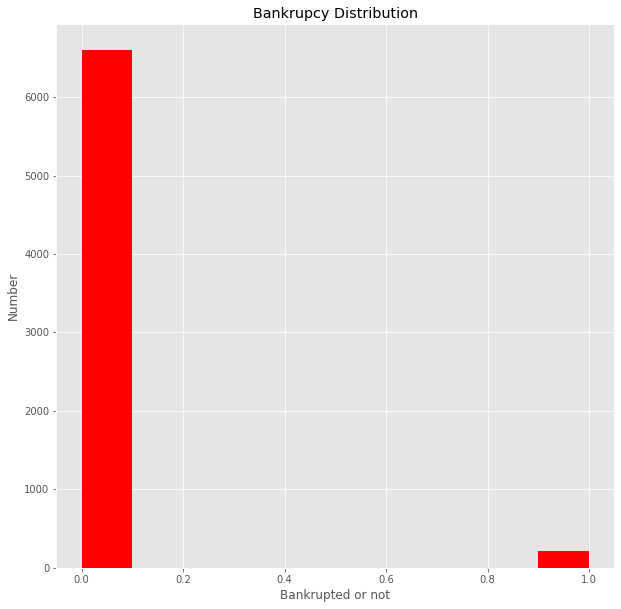

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (10,10))
plt.hist(df['response'], color = 'red')
plt.xlabel('Bankrupted or not')
plt.ylabel('Number')
plt.title('Bankrupcy Distribution')
plt.show()

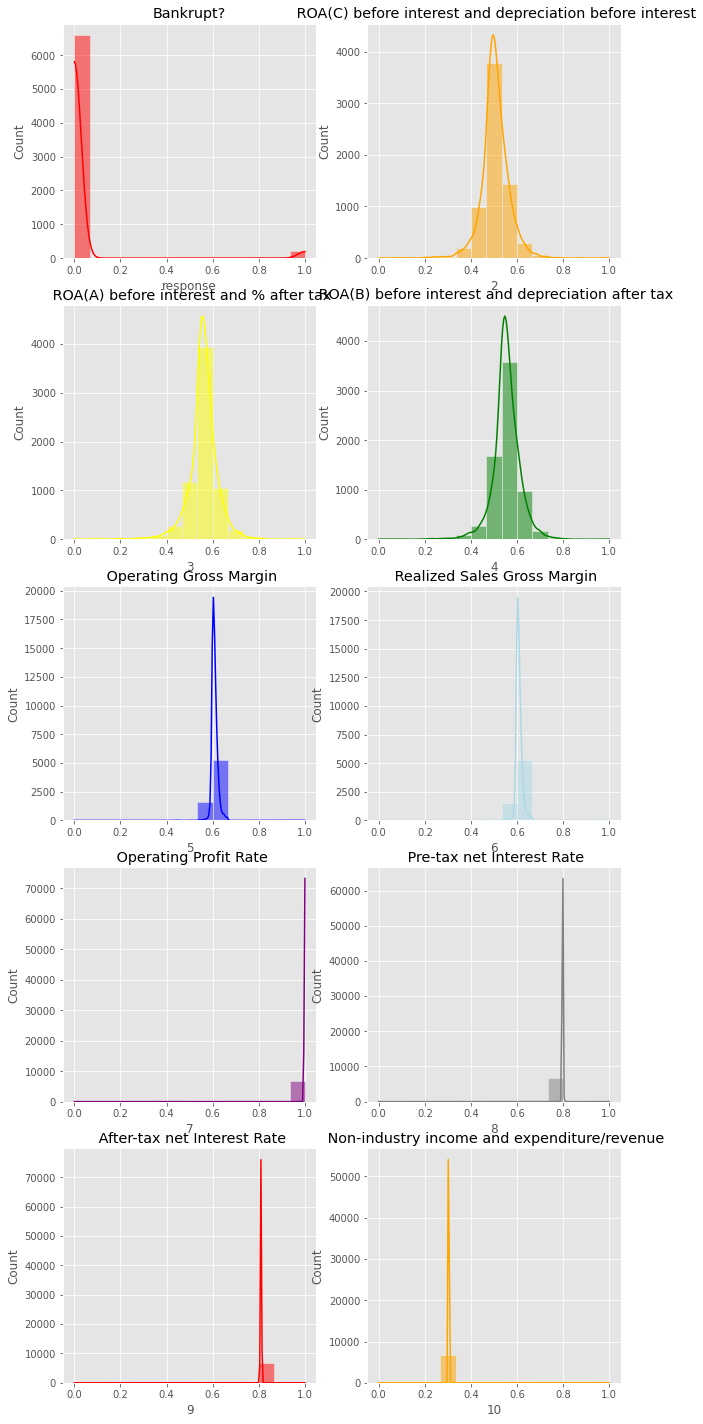

In [ ]:
def pplot(df,a,b):
    color = ['red','orange','yellow','green','blue','lightblue','purple','gray','red','orange','yellow','green','blue','lightblue','purple','gray']
    int_col = df.select_dtypes(['int','float']).columns
    l = range(len(df.columns))
    col = df.columns
    i = 0
    plt.style.use('ggplot')
    plt.figure(figsize = (b*5,a*5))
    for i in l:
        if col[i] in int_col:
            plt.subplot(a,b,i+1)
            sns.histplot(df[col[i]],kde = True, legend = True, color = color[i],bins = 15).set_title(col_namnes[i+1])
            i = i+1
        else:
            plt.subplot(a,b,i+1)
            sns.countplot(df[col[i]],color = color[i]).set_title(col[i])
            i = i+1
    plt.show()  

In [ ]:
# bankrupcy against whether spent on resarch expenditure
print(col_namnes[13])
df['expense0_1'] = pd.cut(df[13],3,labels = ['low', 'medium','high'])
expense = df.groupby(['expense0_1','response']).agg({'response':['count']}).reset_index()
expense.columns = ['expense','Bankrupcy','y']

 Research and development expense rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


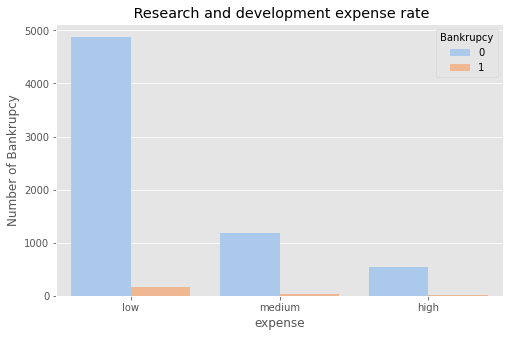

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot('expense','y',hue = 'Bankrupcy', data = expense,palette='pastel')
plt.ylabel('Number of Bankrupcy')
plt.title(col_namnes[13])
plt.show()

## Machine Learning

In [ ]:
X = df.drop(columns = ['response','expense0_1'])
Y = df['response']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25)

In [ ]:
def scale(X_train,X_test):
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_trainS = sc.fit_transform(X_train)
  X_testS = sc.transform(X_test)
  return (X_trainS,X_testS)
X_trainS,X_testS = scale(X_train,X_test)

In [ ]:
x = sm.add_constant(np.array(X_trainS))
y = np.array(Y_train)
result = sm.GLM(y, x, data = df,family = sm.families.Binomial()).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


In [ ]:
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: divide by zero encount

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5114
Model:                            GLM   Df Residuals:                     5022
Model Family:                Binomial   Df Model:                           91
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 01 Mar 2021   Deviance:                          nan
Time:                        17:02:55   Pearson chi2:                 7.97e+17
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.064e+15   9.38e+05  -1.13e+09      0.000   -1.06e+15   -1.06e+15
x1         -4.731e+14   8.05e+06  -5.88e+07      0.000   -4.73e+14   -4.73e+14
x2         -2.457e+13   6.54e+06  -3.76e+06      0.000   -2.46e+13   -2.46e+13
x3          5.764e+14   1.01e+07   5.73e+07      0.000    5.76e+14    5.76e+14
x4          7.423e+16   7.31e+09   1.02e+07      0.000    7.42e+16    7.42e+16
x5          1.009e+15    3.5e+07   2.88e+07      0.000    1.01e+15    1.01e+15
x6          2.012e+18   2.28e+11   8.82e+06      0.000    2.01e+18    2.01e+18
x7         -1.394e+18   1.58e+11  -8.83e+06      0.000   -1.39e+18   -1.39e+18
x8          4.328e+14   9.12e+07   4.75e+06      0.000    4.33e+14    4.33e+14
x9          8.025e+17    9.1e+10   8.82e+06      0.000    8.02e+17    8.02e+17
x10         5.001e+14   6.54e+07   7.65e+06      0.000       5e+14       5e+14
x11        -1.732e+13   1.06e+06  -1.63e+07      0.000   -1.73e+13   -1.73e+13
x12         2.735e+13   9.88e+05   2.77e+07      0.000    2.74e+13    2.74e+13
x13        -1.299e+13   3.52e+06  -3.69e+06      0.000    -1.3e+13    -1.3e+13
x14         7.103e+12   9.64e+05   7.37e+06      0.000     7.1e+12     7.1e+12
x15         8.124e+13   1.08e+06   7.51e+07      0.000    8.12e+13    8.12e+13
x16        -1.641e+15    2.4e+07  -6.84e+07      0.000   -1.64e+15   -1.64e+15
x17         1.662e+15   5.86e+07   2.83e+07      0.000    1.66e+15    1.66e+15
x18        -2.274e+14   5.34e+07  -4.26e+06      0.000   -2.27e+14   -2.27e+14
x19        -4.257e+14    5.1e+06  -8.34e+07      0.000   -4.26e+14   -4.26e+14
x20        -1.272e+14   1.92e+06  -6.62e+07      0.000   -1.27e+14   -1.27e+14
x21         4.391e+14   5.12e+06   8.58e+07      0.000    4.39e+14    4.39e+14
x22         3.762e+14   2.62e+07   1.43e+07      0.000    3.76e+14    3.76e+14
x23         1.648e+14   4.03e+06   4.08e+07      0.000    1.65e+14    1.65e+14
x24        -1.873e+13   9.63e+05  -1.95e+07      0.000   -1.87e+13   -1.87e+13
x25        -3.219e+13    1.4e+06   -2.3e+07      0.000   -3.22e+13   -3.22e+13
x26         8.851e+13   1.04e+07   8.48e+06      0.000    8.85e+13    8.85e+13
x27        -1.404e+13   1.04e+07  -1.35e+06      0.000    -1.4e+13    -1.4e+13
x28          8.92e+13   1.02e+06   8.75e+07      0.000    8.92e+13    8.92e+13
x29        -6.466e+12   9.98e+05  -6.48e+06      0.000   -6.47e+12   -6.47e+12
x30        -1.409e+13   1.13e+06  -1.24e+07      0.000   -1.41e+13   -1.41e+13
x31        -4.523e+13    1.4e+06  -3.23e+07      0.000   -4.52e+13   -4.52e+13
x32         4.991e+13   1.87e+06   2.67e+07      0.000    4.99e+13    4.99e+13
x33        -6.707e+14   2.52e+06  -2.67e+08      0.000   -6.71e+14   -6.71e+14
x34        -1.463e+13      1e+06  -1.46e+07      0.000   -1.46e+13   -1.46e+13
x35         4.757e+13   9.47e+05   5.02e+07      0.000    4.76e+13    4.76e+13
x3

### Run Logistic Regression

In [ ]:
def logistic(X_train, X_test, Y_train, Y_test):
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression()
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)
y_pred = logistic(X_trainS, X_testS, Y_train, Y_test).ravel()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
def result_table(Y_test, y_pred ):
  cm = confusion_matrix(Y_test, y_pred)
  print(cm)
  print(classification_report(Y_test, y_pred))
result_table(Y_test, y_pred)

[[1648   11]
 [  33   13]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1659
           1       0.54      0.28      0.37        46

    accuracy                           0.97      1705
   macro avg       0.76      0.64      0.68      1705
weighted avg       0.97      0.97      0.97      1705



### Knn

In [ ]:
def knn(X_train, X_test, Y_train, Y_test):
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = int(np.sqrt(len(X_train))+1), p = 2) # euclidean_distance
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)
y_pred = knn(X_trainS,X_testS,Y_train,Y_test).ravel()

In [ ]:
result_table(Y_test, y_pred)

[[1659    0]
 [  46    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1659
           1       0.00      0.00      0.00        46

    accuracy                           0.97      1705
   macro avg       0.49      0.50      0.49      1705
weighted avg       0.95      0.97      0.96      1705



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [ ]:
def svm(X_train, X_test, Y_train, Y_test):
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'linear')
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)

y_pred = svm(X_trainS,X_testS,Y_train,Y_test).ravel()

In [ ]:
result_table(Y_test, y_pred)

[[1655    4]
 [  41    5]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1659
           1       0.56      0.11      0.18        46

    accuracy                           0.97      1705
   macro avg       0.77      0.55      0.58      1705
weighted avg       0.96      0.97      0.96      1705



### Decision tree

In [ ]:
def tree(X_train, X_test, Y_train, Y_test):
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy')
    classifier.fit(X_train, Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)

y_pred = tree(X_trainS,X_testS,Y_train,Y_test).ravel()

In [ ]:
result_table(Y_test, y_pred)

[[1612   47]
 [  36   10]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1659
           1       0.18      0.22      0.19        46

    accuracy                           0.95      1705
   macro avg       0.58      0.59      0.58      1705
weighted avg       0.96      0.95      0.95      1705



### Naive bayes

In [ ]:
def naive(X_train, X_test, Y_train, Y_test):
    from sklearn.naive_bayes import GaussianNB
    classifier = GaussianNB()
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)

y_pred = naive(X_trainS,X_testS,Y_train,Y_test).ravel()

In [ ]:
result_table(Y_test, y_pred)

[[ 353 1306]
 [   2   44]]
              precision    recall  f1-score   support

           0       0.99      0.21      0.35      1659
           1       0.03      0.96      0.06        46

    accuracy                           0.23      1705
   macro avg       0.51      0.58      0.21      1705
weighted avg       0.97      0.23      0.34      1705



### Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(94,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(47,activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(23,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(11,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

earstop = EarlyStopping(monitor = 'val_loss', mode ='min', verbose = 1, patience = 20)
model.fit(x = X_trainS, y = Y_train, epochs = 100, validation_data=(X_testS,Y_test), callbacks = [earstop])

Epoch 1/100
160/160 [==============================] - 1s 4ms/step - loss: 0.8888 - val_loss: 22996870.0000
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4048 - val_loss: 25982150.0000
Epoch 3/100
160/160 [==============================] - 0s 3ms/step - loss: 0.3200 - val_loss: 20881620.0000
Epoch 4/100
160/160 [==============================] - 0s 3ms/step - loss: 0.2760 - val_loss: 15851916.0000
Epoch 5/100
160/160 [==============================] - 0s 3ms/step - loss: 0.2515 - val_loss: 13844223.0000
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2300 - val_loss: 12497919.0000
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2187 - val_loss: 12045623.0000
Epoch 8/100
160/160 [==============================] - 0s 3ms/step - loss: 0.2124 - val_loss: 10046326.0000
Epoch 9/100
160/160 [==============================] - 0s 2ms/step - loss: 0.1827 - val_loss: 11136092.0000
Epoch 10/100
160/160 [======

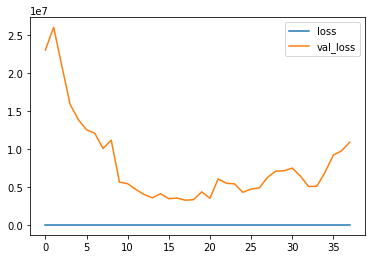

In [ ]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_trainS = pca.fit_transform(X_trainS)
X_testS = pca.transform(X_testS)

In [ ]:
model = Sequential()
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

earstop = EarlyStopping(monitor = 'val_loss', mode ='min', verbose = 1, patience = 20)
model.fit(x = X_trainS, y = Y_train, epochs = 100, validation_data=(X_testS,Y_test), callbacks = [earstop])

Epoch 1/100
160/160 [==============================] - 1s 3ms/step - loss: 0.7134 - val_loss: 5755656.0000
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5094 - val_loss: 7248323.0000
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4137 - val_loss: 8857832.0000
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3151 - val_loss: 9510699.0000
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2861 - val_loss: 10685102.0000
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2934 - val_loss: 10942251.0000
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2036 - val_loss: 11095305.0000
Epoch 8/100
160/160 [==============================] - 0s 2ms/step - loss: 0.1923 - val_loss: 10033714.0000
Epoch 9/100
160/160 [==============================] - 0s 2ms/step - loss: 0.1757 - val_loss: 9034948.0000
Epoch 10/100
160/160 [===========

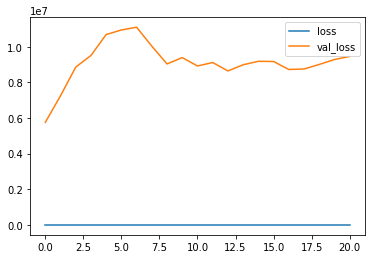

In [ ]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
X = df.drop(columns = ['response','expense0_1'])
Y = df['response']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25)
def scale(X_train,X_test):
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_trainS = sc.fit_transform(X_train)
  X_testS = sc.transform(X_test)
  return (X_trainS,X_testS)
X_trainS,X_testS = scale(X_train,X_test)

In [ ]:
encoder = Sequential()
encoder.add(Dense(units = 20, activation = 'relu', input_shape = [95]))
decoder = Sequential()
decoder.add(Dense(units = 95, activation = 'relu', input_shape = [20]))
autoen = Sequential([encoder,decoder])
from tensorflow.keras.optimizers import SGD
autoen.compile(loss="mse")
autoen.fit(x = X_trainS, y = X_trainS, epochs=20)

Epoch 1/20
160/160 [==============================] - 1s 1ms/step - loss: 0.9821
Epoch 2/20
160/160 [==============================] - 0s 1ms/step - loss: 1.0240
Epoch 3/20
160/160 [==============================] - 0s 1ms/step - loss: 0.7990
Epoch 4/20
160/160 [==============================] - 0s 945us/step - loss: 0.7877
Epoch 5/20
160/160 [==============================] - 0s 1ms/step - loss: 0.7414
Epoch 6/20
160/160 [==============================] - 0s 985us/step - loss: 0.6744
Epoch 7/20
160/160 [==============================] - 0s 917us/step - loss: 0.7094
Epoch 8/20
160/160 [==============================] - 0s 1ms/step - loss: 0.6323
Epoch 9/20
160/160 [==============================] - 0s 1ms/step - loss: 0.7365
Epoch 10/20
160/160 [==============================] - 0s 1ms/step - loss: 0.6990
Epoch 11/20
160/160 [==============================] - 0s 1ms/step - loss: 0.6807
Epoch 12/20
160/160 [==============================] - 0s 1ms/step - loss: 0.7055
Epoch 13/20
160/160

In [ ]:
X_trainS = encoder.predict(X_trainS)
X_testS = encoder.predict(X_testS)

In [ ]:
model = Sequential()
model.add(Dense(20,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

earstop = EarlyStopping(monitor = 'val_loss', mode ='min', verbose = 1, patience = 20)
model.fit(x = X_trainS, y = Y_train, epochs = 100, validation_data=(X_testS,Y_test), callbacks = [earstop])

Epoch 1/100
160/160 [==============================] - 1s 3ms/step - loss: 0.7464 - val_loss: 0.2342
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4561 - val_loss: 0.1943
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3432 - val_loss: 0.1640
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2968 - val_loss: 0.1472
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2684 - val_loss: 0.1437
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2382 - val_loss: 0.1347
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2431 - val_loss: 0.1301
Epoch 8/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2093 - val_loss: 0.1224
Epoch 9/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2267 - val_loss: 0.1214
Epoch 10/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2006 - val_lo

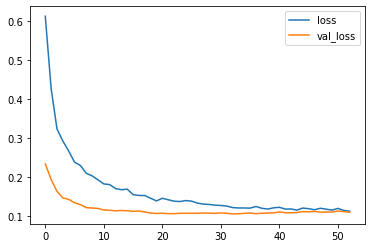

In [ ]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
y_pred = model.predict_classes(X_testS)
result_table(Y_test, y_pred)

[[1649    0]
 [  55    1]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1649
           1       1.00      0.02      0.04        56

    accuracy                           0.97      1705
   macro avg       0.98      0.51      0.51      1705
weighted avg       0.97      0.97      0.95      1705



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
